In [18]:
import pandas as pd


In [19]:
dataframe = pd.read_csv("../data/84_amb2_2.1.csv", delimiter=";", skiprows=45, parse_dates=['Timestamp'])
dataframe

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10724\3428632325.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe = pd.read_csv("../data/84_amb2_2.1.csv", delimiter=";", skiprows=45, parse_dates=['Timestamp'])


,Unnamed: 0,Timestamp,Source Value,Reading
0,NaN,(seconds),(Volts),(Amps)
1,1.0,0.0,-0.7,-1.574755E-5
2,2.0,0.499888,-0.6858586,-1.404285E-5
3,3.0,0.999888,-0.6717172,-1.379252E-5
4,4.0,1.499888,-0.6575758,-1.322031E-5
...,...,...,...,...
96,96.0,47.49989,0.6434343,1.401901E-5
97,97.0,47.99989,0.6575758,1.437664E-5
98,98.0,48.49989,0.6717172,1.538992E-5
99,99.0,48.99989,0.6858586,1.517534E-5


In [20]:
dataframe.index[0]

0

In [21]:
dataframe = dataframe.drop(dataframe.index[0])
dataframe

,Unnamed: 0,Timestamp,Source Value,Reading
1,1.0,0.0,-0.7,-1.574755E-5
2,2.0,0.499888,-0.6858586,-1.404285E-5
3,3.0,0.999888,-0.6717172,-1.379252E-5
4,4.0,1.499888,-0.6575758,-1.322031E-5
5,5.0,1.999888,-0.6434343,-1.263618E-5
...,...,...,...,...
96,96.0,47.49989,0.6434343,1.401901E-5
97,97.0,47.99989,0.6575758,1.437664E-5
98,98.0,48.49989,0.6717172,1.538992E-5
99,99.0,48.99989,0.6858586,1.517534E-5


In [22]:
dataframe.drop(columns=['Unnamed: 0'], inplace=True)
dataframe

,Timestamp,Source Value,Reading
1,0.0,-0.7,-1.574755E-5
2,0.499888,-0.6858586,-1.404285E-5
3,0.999888,-0.6717172,-1.379252E-5
4,1.499888,-0.6575758,-1.322031E-5
5,1.999888,-0.6434343,-1.263618E-5
...,...,...,...
96,47.49989,0.6434343,1.401901E-5
97,47.99989,0.6575758,1.437664E-5
98,48.49989,0.6717172,1.538992E-5
99,48.99989,0.6858586,1.517534E-5


In [23]:
dataframe.columns

Index(['Timestamp', 'Source Value', 'Reading'], dtype='object')

In [24]:
dataframe.describe()

,Timestamp,Source Value,Reading
count,100,100,100
unique,100,100,98
top,0.0,-0.7,-1.13368E-5
freq,1,1,2


In [25]:
dataframe.shape

(100, 3)

In [26]:
dataframe.size

300

In [27]:
# changer le nom de la colonne du temps
dataframe = dataframe.set_index('Timestamp')

In [28]:
# Mettre les ligne en ordre en fonction de l'index aui est le temps
dataframe = dataframe.sort_index()

In [29]:
# Debut du document
dataframe.head()

,Source Value,Reading
Timestamp,,
0.0,-0.7,-1.574755E-5
0.499888,-0.6858586,-1.404285E-5
0.999888,-0.6717172,-1.379252E-5
1.499888,-0.6575758,-1.322031E-5
1.999888,-0.6434343,-1.263618E-5


In [30]:
# info su r les donnees
print("DataFrame Info:")
dataframe.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0.0 to 9.999889
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source Value  100 non-null    object
 1   Reading       100 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [31]:
# Conversion des colonnes en float
dataframe['Source Value'] = dataframe['Source Value'].str.replace(',', '.').astype(float)
dataframe['Reading'] = dataframe['Reading'].str.replace(',', '.').astype(float)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0.0 to 9.999889
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Source Value  100 non-null    float64
 1   Reading       100 non-null    float64
dtypes: float64(2)
memory usage: 2.3+ KB


In [32]:
# Regardond levolution du temps
print(f"Debut: {dataframe.index.min()}")
print(f"Fin: {dataframe.index.max()}")

Debut: 0.0
Fin: 9.999889


In [33]:
dataframe.head()

,Source Value,Reading
Timestamp,,
0.0,-0.700000,-0.000016
0.499888,-0.685859,-0.000014
0.999888,-0.671717,-0.000014
1.499888,-0.657576,-0.000013
1.999888,-0.643434,-0.000013


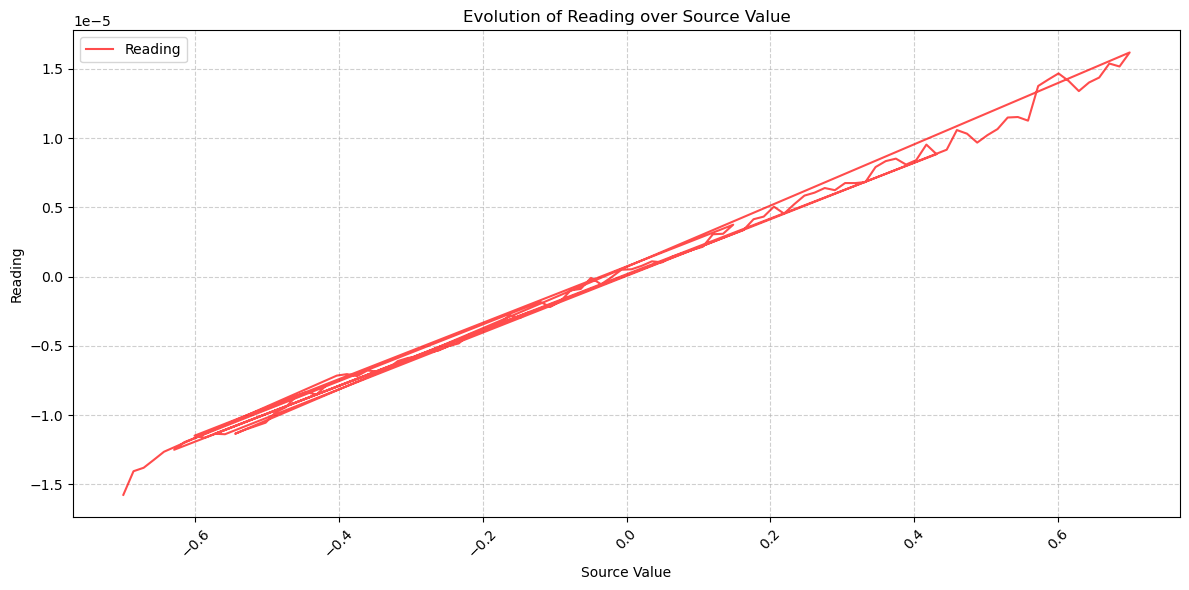

In [34]:
import matplotlib.pyplot as plt

# Create figure and axis with specific size
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dataframe['Source Value'], dataframe['Reading'], 'r-', label='Reading', alpha=0.7)

# Customize the plot
ax.set_title('Evolution of Reading over Source Value')
ax.set_xlabel('Source Value')
ax.set_ylabel('Reading')
ax.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()